# Why and when should we use correlation coefficients designed for ordinal-scale data?

In some cases, standard correlation coefficients like Pearson's are not appropriate for ordinal data, because they assume interval scale measurements and linear relationships. For some ordinal data—such as Likert scale responses or exam grades—this assumption may not hold.

**Polyserial** and **Polychoric** correlation coefficients are designed to handle this situation. They assume that the **observed ordinal or categorical variables arise from underlying latent continuous variables** that have been discretized by thresholds.

For example, if you are working with survey or questionnaire data, where participants respond using ordered categories (e.g., "strongly disagree" to "strongly agree"), polyserial or polychoric correlations can capture the latent relationships between attitudes or traits that those responses reflect.

Using correlation coefficients tailored for ordinal scale data helps preserve the meaningful order of categories and avoids misleading results from inappropriately applying Pearson or Spearman correlations.

## Numerical Example

Here is a numerical example to illustrate the concept.

Suppose there are latent variables $X^*$ and $Y^*$ that follow a bivariate standard normal distribution:

$$
\left(X^*, Y^*\right) \sim \mathcal{N}\left(
\begin{bmatrix}
0 \\
0
\end{bmatrix},
\begin{bmatrix}
1 & \rho \\
\rho & 1
\end{bmatrix}
\right)
$$

The observable categorical variables $X$ and $Y$ are obtained by discretizing the latent variables using certain thresholds.


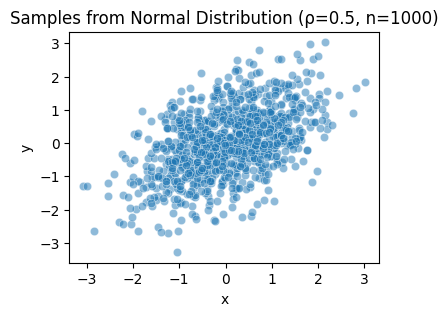

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# generate data by 2-variate normal distribution
rho = 0.5
n = 1000
Cov = np.array([[1, rho], [rho, 1]])
X = multivariate_normal.rvs(cov=Cov, size=n, random_state=0)
continuous_data = pd.DataFrame(X, columns=["x", "y"])

# plot the data
fig, ax = plt.subplots(figsize=[4, 3])
sns.scatterplot(data=continuous_data, x="x", y="y", ax=ax, alpha=0.5)
_ = ax.set(title=f"Samples from Normal Distribution (ρ={rho}, n={n})")

We then calculate correlations from the observed data using the following coefficients:

1. Polychoric correlation coefficient  
2. Pearson correlation coefficient  
3. Spearman correlation coefficient  
4. Kendall correlation coefficient  

The figure below shows the estimated coefficients for different numbers of categories.

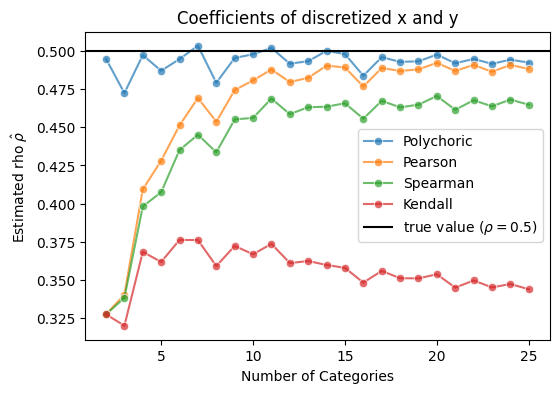

In [3]:
from ordinalcorr import polychoric
from scipy.stats import pearsonr, spearmanr, kendalltau

# calc correlation coefficients for different number of categories
results = []
for n_categories in range(2, 26):
    # discretize the data
    x, _ = pd.cut(continuous_data["x"], bins=n_categories).factorize(sort=True)
    y, _ = pd.cut(continuous_data["y"], bins=n_categories).factorize(sort=True)

    # calculate correlation coefficients
    results += [
        dict(method="Polychoric", value=polychoric(x, y), n_categories=n_categories),
        dict(method="Pearson", value=pearsonr(x, y).statistic, n_categories=n_categories),
        dict(method="Spearman", value=spearmanr(x, y).statistic, n_categories=n_categories),
        dict(method="Kendall", value=kendalltau(x, y).statistic, n_categories=n_categories),
    ]
results = pd.DataFrame(results)

# plot the results
fig, ax = plt.subplots(figsize=[6, 4], dpi=100)
sns.lineplot(x="n_categories", y="value", data=results, hue="method", marker="o", ax=ax, alpha=0.7)
ax.axhline(rho, label=r"true value ($\rho=$" + f"{rho})", color="black")
ax.set(
    xlabel="Number of Categories",
    ylabel=r"Estimated rho $\hat{\rho}$",
    title="Coefficients of discretized x and y"
)
_ = ax.legend()

The polychoric correlation is designed for this situation and performs well.  
In contrast, Pearson correlation tends to underestimate the true correlation, especially when the number of categories is small. 
Spearman and Kendall are not well-suited for this type of data.